In [1]:
# Importing dataset
import pandas as pd
from pycaret.classification import *
import pyreadr
import os

result = pyreadr.read_r('data.Rda')
emailDFrp = result["emailDFrp"]
emailDFrp = emailDFrp.replace('T', 1)
emailDFrp = emailDFrp.replace('F', 0)
emailDFrp

PyreadrError: File data.Rda does not exist!

In [2]:
emailDFrp = emailDFrp.apply(pd.to_numeric) 

NameError: name 'emailDFrp' is not defined

In [3]:
emailDFrp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9348 entries, 0 to 9347
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   isSpam         9348 non-null   int64  
 1   isRe           9348 non-null   int64  
 2   underscore     9348 non-null   int64  
 3   priority       9348 non-null   int64  
 4   isInReplyTo    9348 non-null   int64  
 5   sortedRec      9348 non-null   int64  
 6   subPunc        9348 non-null   int64  
 7   multipartText  9348 non-null   int64  
 8   hasImages      9348 non-null   int64  
 9   isPGPsigned    9348 non-null   int64  
 10  subSpamWords   9341 non-null   float64
 11  noHost         9347 non-null   float64
 12  numEnd         9348 non-null   int64  
 13  isYelling      9341 non-null   float64
 14  isOrigMsg      9348 non-null   int64  
 15  isDear         9348 non-null   int64  
 16  isWrote        9348 non-null   int64  
 17  numLines       9348 non-null   int32  
 18  bodyChar

In [4]:
exp_clf = setup(emailDFrp, 
                target = 'isSpam', 
                train_size = 0.7, 
                categorical_imputation = 'mode', 
                profile = True,
                transformation = True,
                create_clusters = True)

In [72]:
#Dont run this unless you want to wait for it
compare_models()

In [5]:
#creat extra trees
tuned_et = tune_model('et')

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.9649  0.9939  0.8929  0.9677  0.9288  0.9055
1       0.9557  0.9915  0.8869  0.9371  0.9113  0.8818
2       0.9573  0.9932  0.8929  0.9375  0.9146  0.8861
3       0.9664  0.9948  0.9226  0.9451  0.9337  0.9112
4       0.9587  0.9910  0.9226  0.9172  0.9199  0.8921
5       0.9511  0.9925  0.8393  0.9658  0.8981  0.8661
6       0.9541  0.9911  0.8690  0.9481  0.9068  0.8765
7       0.9633  0.9870  0.8869  0.9675  0.9255  0.9012
8       0.9618  0.9943  0.8982  0.9494  0.9231  0.8977
9       0.9618  0.9885  0.8922  0.9551  0.9226  0.8973
Mean    0.9595  0.9918  0.8904  0.9490  0.9184  0.8916
SD      0.0047  0.0024  0.0229  0.0152  0.0102  0.0132

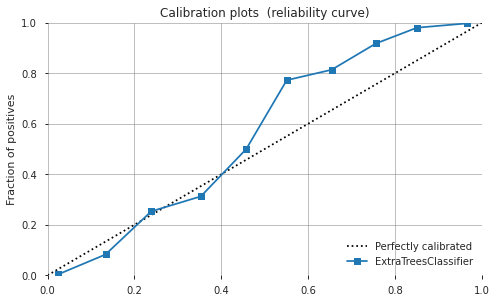

In [6]:
plot_model(tuned_et, plot='calibration')

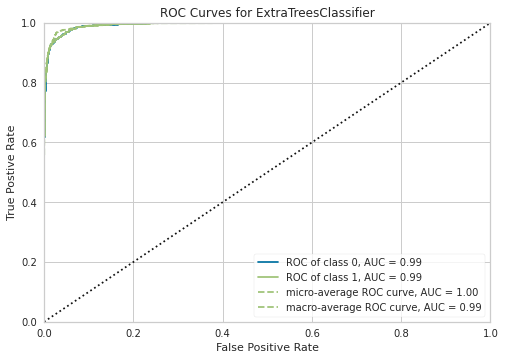

In [7]:
plot_model(tuned_et, plot = 'auc')

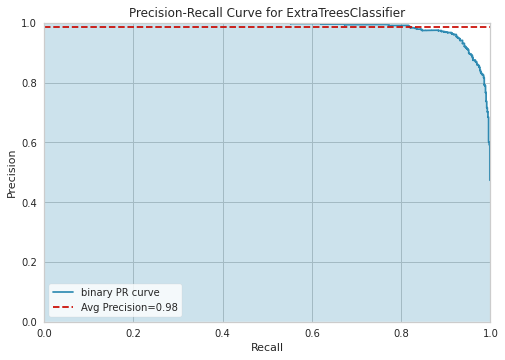

In [8]:
plot_model(tuned_et, plot = 'pr')

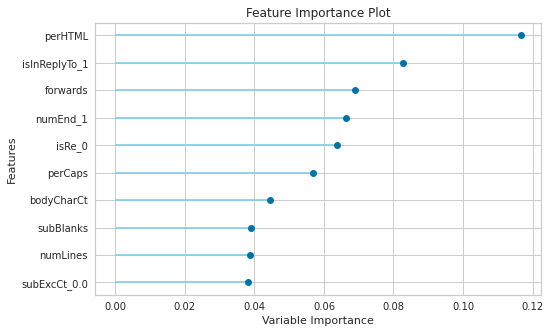

In [9]:
plot_model(tuned_et, plot='feature')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


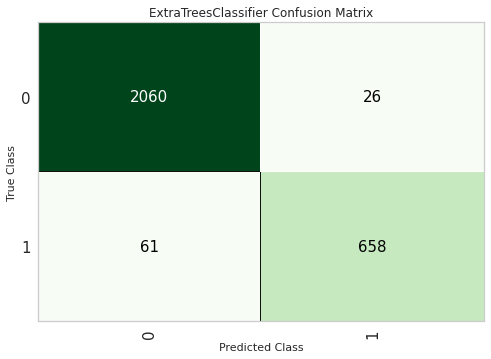

In [10]:
plot_model(tuned_et, plot = 'confusion_matrix')

In [11]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [13]:
# create a decision tree model
tuned_dt = tune_model('dt') 

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.9328  0.9389  0.8274  0.9026  0.8634  0.8189
1       0.9496  0.9535  0.8810  0.9193  0.8997  0.8661
2       0.9313  0.9521  0.7857  0.9362  0.8544  0.8099
3       0.9633  0.9508  0.9107  0.9444  0.9273  0.9027
4       0.9526  0.9645  0.8750  0.9363  0.9046  0.8731
5       0.9450  0.9515  0.8631  0.9177  0.8896  0.8530
6       0.9450  0.9349  0.8393  0.9400  0.8868  0.8506
7       0.9343  0.9252  0.8095  0.9252  0.8635  0.8204
8       0.9511  0.9533  0.8563  0.9470  0.8994  0.8672
9       0.9434  0.9545  0.8443  0.9276  0.8840  0.8467
Mean    0.9448  0.9479  0.8492  0.9296  0.8873  0.8509
SD      0.0095  0.0109  0.0345  0.0131  0.0211  0.0271

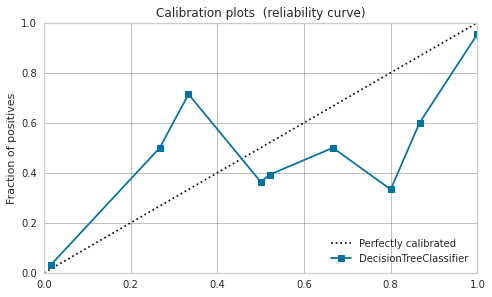

In [14]:
plot_model(tuned_dt, plot='calibration')

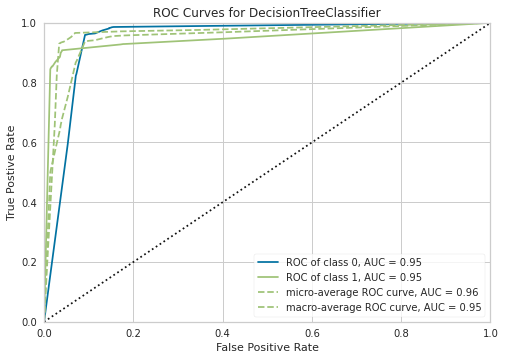

In [15]:
plot_model(tuned_dt, plot = 'auc')

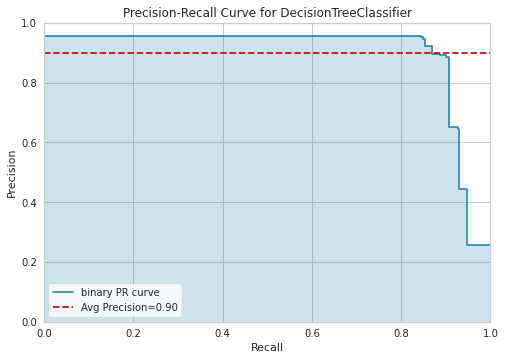

In [16]:
plot_model(tuned_dt, plot = 'pr')

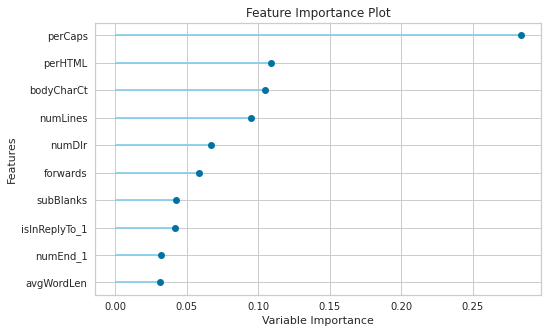

In [17]:
plot_model(tuned_dt, plot='feature')

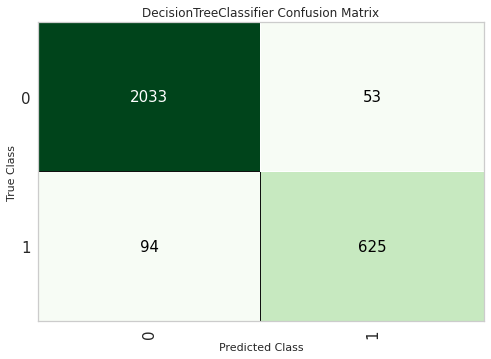

In [18]:
plot_model(tuned_dt, plot = 'confusion_matrix')

In [47]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [48]:
# ensemble trained decision tree model 
ensembled_dt = ensemble_model(tuned_dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.9649  0.9901  0.9464  0.9191  0.9326  0.9088
1       0.9679  0.9929  0.9345  0.9401  0.9373  0.9158
2       0.9679  0.9950  0.9345  0.9401  0.9373  0.9158
3       0.9709  0.9874  0.9281  0.9568  0.9422  0.9228
4       0.9618  0.9846  0.8802  0.9671  0.9216  0.8964
5       0.9541  0.9802  0.9107  0.9107  0.9107  0.8799
6       0.9740  0.9866  0.9583  0.9415  0.9499  0.9323
7       0.9679  0.9934  0.9405  0.9349  0.9377  0.9161
8       0.9602  0.9819  0.9048  0.9383  0.9212  0.8946
9       0.9633  0.9882  0.9048  0.9500  0.9268  0.9024
Mean    0.9653  0.9880  0.9243  0.9399  0.9317  0.9085
SD      0.0054  0.0047  0.0224  0.0156  0.0110  0.0146

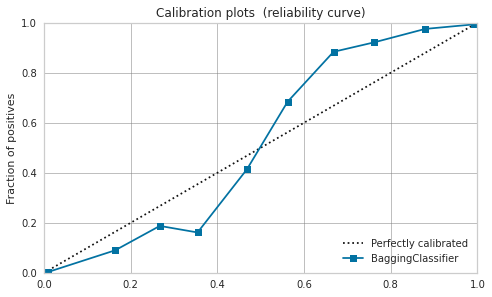

In [49]:
plot_model(ensembled_dt, plot='calibration')

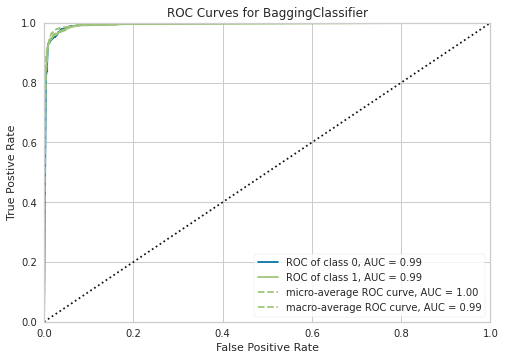

In [50]:
plot_model(ensembled_dt, plot = 'auc')

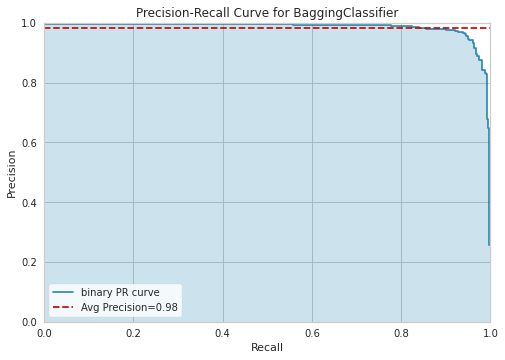

In [51]:
plot_model(ensembled_dt, plot = 'pr')

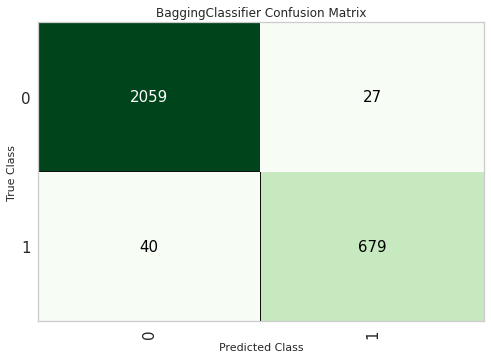

In [53]:
plot_model(ensembled_dt, plot = 'confusion_matrix')

In [54]:
evaluate_model(ensembled_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [55]:
# create a random forest
tuned_rf = tune_model('rf') 

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.9771  0.9949  0.9643  0.9474  0.9558  0.9403
1       0.9740  0.9957  0.9464  0.9521  0.9493  0.9318
2       0.9740  0.9960  0.9524  0.9467  0.9496  0.9321
3       0.9694  0.9940  0.9222  0.9565  0.9390  0.9186
4       0.9771  0.9951  0.9341  0.9750  0.9541  0.9388
5       0.9664  0.9945  0.9524  0.9195  0.9357  0.9129
6       0.9771  0.9943  0.9524  0.9581  0.9552  0.9398
7       0.9771  0.9973  0.9524  0.9581  0.9552  0.9398
8       0.9664  0.9925  0.9345  0.9345  0.9345  0.9119
9       0.9694  0.9926  0.9167  0.9625  0.9390  0.9186
Mean    0.9728  0.9947  0.9428  0.9510  0.9467  0.9285
SD      0.0043  0.0014  0.0145  0.0146  0.0083  0.0111

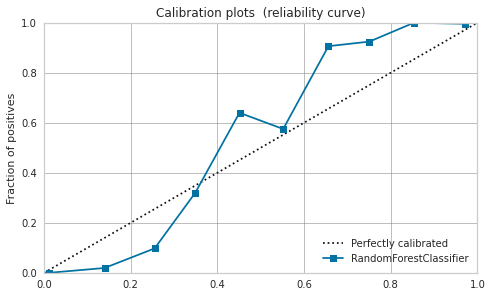

In [56]:
plot_model(tuned_rf, plot='calibration')

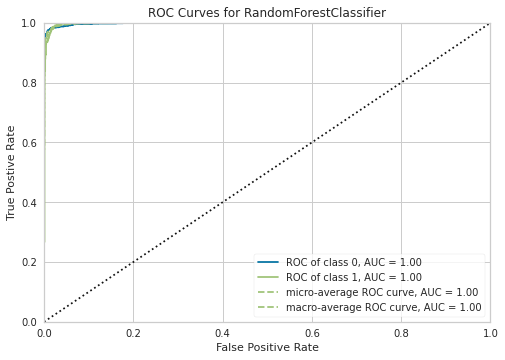

In [57]:
plot_model(tuned_rf, plot = 'auc')

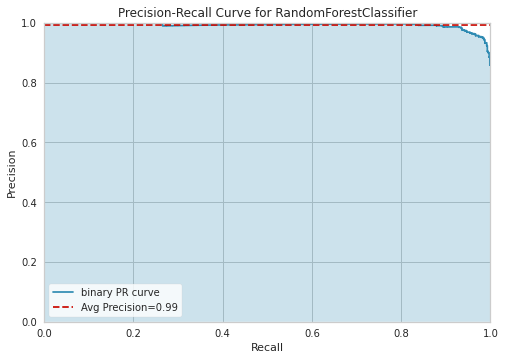

In [58]:
plot_model(tuned_rf, plot = 'pr')

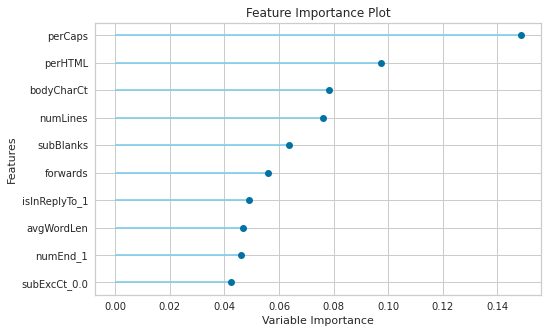

In [59]:
plot_model(tuned_rf, plot='feature')

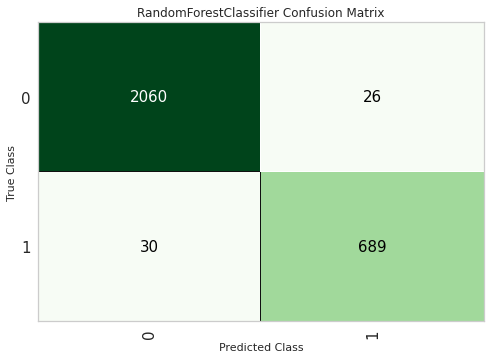

In [60]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [62]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [63]:
#blend trained models
blend_specific = blend_models(estimator_list = [tuned_rf, tuned_et, ensembled_dt])

Accuracy  AUC  Recall   Prec.      F1   Kappa
0       0.9802  0.0  0.9702  0.9532  0.9617  0.9483
1       0.9756  0.0  0.9524  0.9524  0.9524  0.9360
2       0.9710  0.0  0.9405  0.9461  0.9433  0.9238
3       0.9740  0.0  0.9281  0.9688  0.9480  0.9307
4       0.9740  0.0  0.9222  0.9747  0.9477  0.9304
5       0.9618  0.0  0.9345  0.9181  0.9263  0.9005
6       0.9786  0.0  0.9583  0.9583  0.9583  0.9439
7       0.9755  0.0  0.9464  0.9578  0.9521  0.9357
8       0.9664  0.0  0.9226  0.9451  0.9337  0.9112
9       0.9679  0.0  0.9107  0.9623  0.9358  0.9144
Mean    0.9725  0.0  0.9386  0.9537  0.9459  0.9275
SD      0.0054  0.0  0.0175  0.0148  0.0106  0.0143

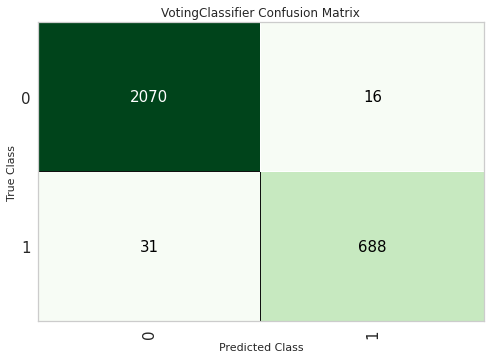

In [68]:
plot_model(blend_specific, plot = 'confusion_matrix')

In [ ]:
# interpret_model: SHAP
#interpret_model(tuned_et)

[Text(343.6591137770898, 290.1864705882353, 'X[4] <= 1.031\ngini = 0.381\nsamples = 6543\nvalue = [4865, 1678]'),
 Text(276.1279411764706, 272.5994117647059, 'X[6] <= 1.137\ngini = 0.286\nsamples = 5610\nvalue = [4641, 969]'),
 Text(201.73513931888544, 255.0123529411765, 'X[8] <= 0.127\ngini = 0.227\nsamples = 5169\nvalue = [4493, 676]'),
 Text(118.76934984520123, 237.42529411764707, 'X[10] <= 0.5\ngini = 0.36\nsamples = 2811\nvalue = [2150, 661]'),
 Text(36.45139318885449, 219.83823529411765, 'X[27] <= 0.5\ngini = 0.283\nsamples = 2329\nvalue = [1931, 398]'),
 Text(13.820433436532507, 202.25117647058823, 'X[1] <= 533.5\ngini = 0.469\nsamples = 136\nvalue = [51, 85]'),
 Text(8.292260061919503, 184.66411764705884, 'X[4] <= -0.32\ngini = 0.337\nsamples = 42\nvalue = [33, 9]'),
 Text(5.528173374613003, 167.0770588235294, 'X[0] <= 12.0\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(2.7640866873065013, 149.49, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(8.292260061919503, 149.49

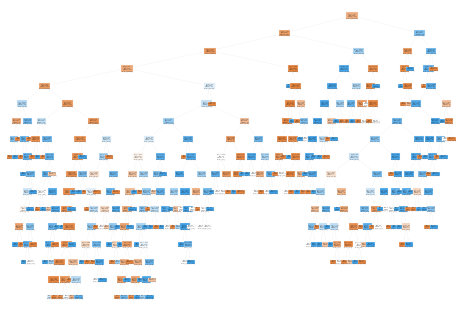

In [22]:
from sklearn import tree
tree.plot_tree(tuned_dt, filled=True)